# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'19d7a4c253907c7bd1606f5d22726862'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL for fetching weather by city name
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Check if the response contains 'coord' to ensure city was found
        if 'coord' in city_weather:
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"City not found in API response. Skipping: {city}")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazovsky
Processing Record 2 of Set 1 | nuuk
Processing Record 3 of Set 1 | utrik
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | sinabang
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | tchollire
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | anloga
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | peasedown saint john
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | kulia village
City not found in API response. Skipping: kulia village
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | cabedelo
Processing Record 21 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazovsky,67.4667,78.7000,-4.20,93,100,5.67,RU,1728353875
1,nuuk,64.1835,-51.7216,2.34,69,18,5.14,GL,1728354469
2,utrik,11.2278,169.8474,28.69,76,1,3.91,MH,1728354470
3,waitangi,-43.9535,-176.5597,11.57,98,51,5.36,NZ,1728354471
4,sinabang,2.4803,96.3801,27.48,80,100,2.92,ID,1728354472


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-4.20,93,100,5.67,RU,1728353875
1,nuuk,64.1835,-51.7216,2.34,69,18,5.14,GL,1728354469
2,utrik,11.2278,169.8474,28.69,76,1,3.91,MH,1728354470
3,waitangi,-43.9535,-176.5597,11.57,98,51,5.36,NZ,1728354471
4,sinabang,2.4803,96.3801,27.48,80,100,2.92,ID,1728354472


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

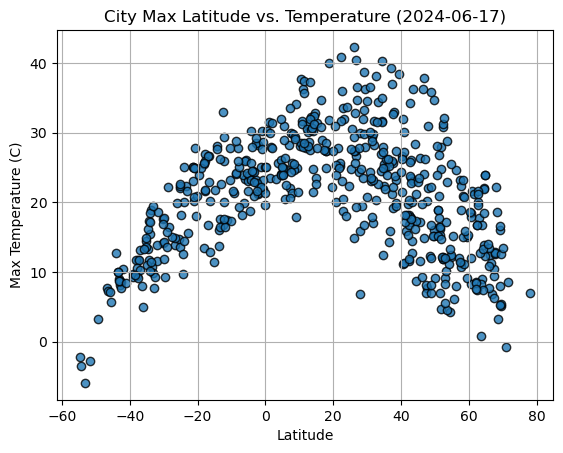

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

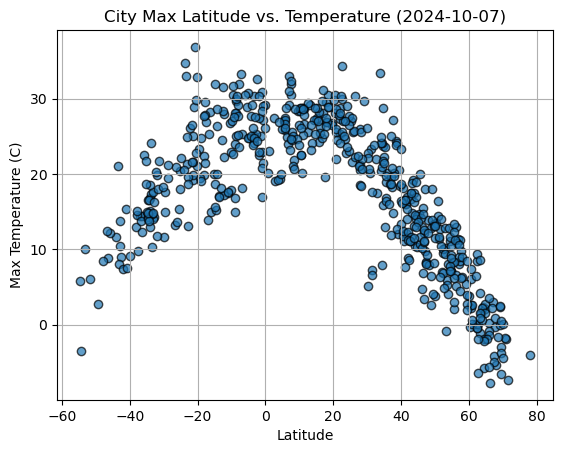

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({pd.Timestamp.today().date()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

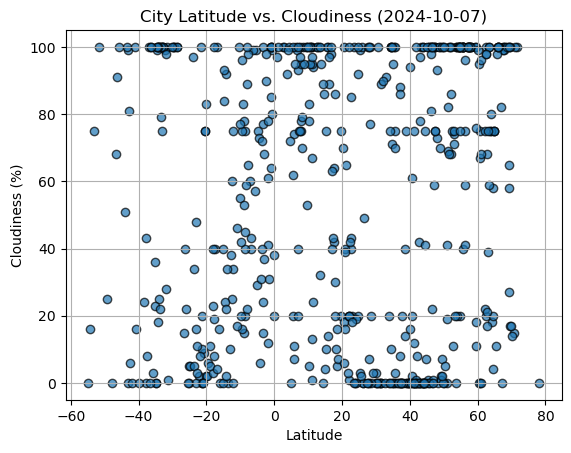

In [11]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({pd.Timestamp.today().date()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

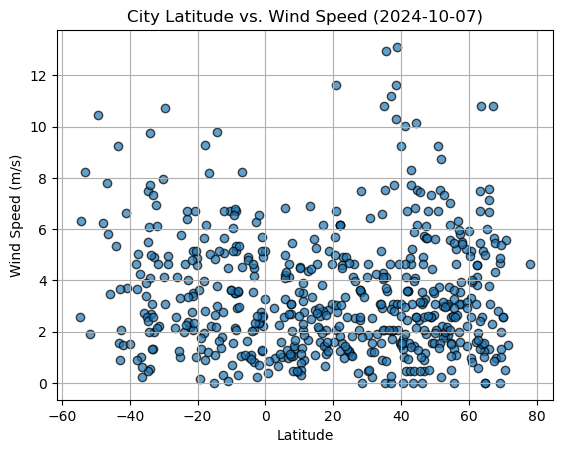

In [12]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', alpha=0.7)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({pd.Timestamp.today().date()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor='black', alpha=0.7)
    plt.plot(x_values, regress_values, "r-")
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add equation and r-squared value text to plot in red
    line_eq = f"y = {slope:.2f}x + {intercept:.1f}"
    plt.annotate(line_eq, text_coordinates, fontsize=10, color="red")
    
    # Show plot
    plt.grid(True)
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-4.20,93,100,5.67,RU,1728353875
1,nuuk,64.1835,-51.7216,2.34,69,18,5.14,GL,1728354469
2,utrik,11.2278,169.8474,28.69,76,1,3.91,MH,1728354470
4,sinabang,2.4803,96.3801,27.48,80,100,2.92,ID,1728354472
6,tchollire,8.4022,14.1698,21.82,95,100,1.32,CM,1728354474


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,11.57,98,51,5.36,NZ,1728354471
5,uturoa,-16.7333,-151.4333,25.27,72,100,8.21,PF,1728354473
9,port elizabeth,-33.9180,25.5701,16.84,89,100,9.77,ZA,1728354478
11,puerto ayora,-0.7393,-90.3518,21.42,95,99,2.24,EC,1728354480
12,puerto natales,-51.7236,-72.4875,6.01,95,100,1.91,CL,1728354185


###  Temperature vs. Latitude Linear Regression Plot

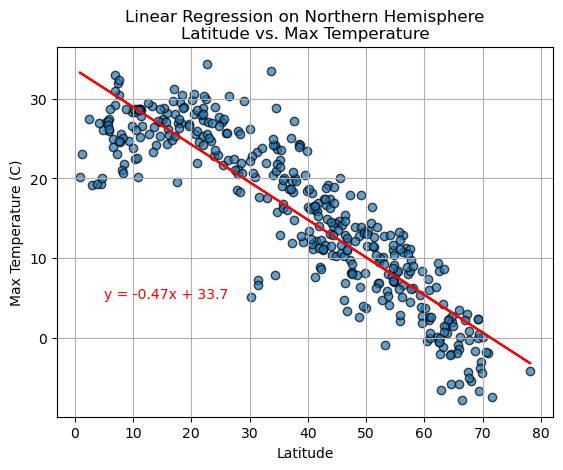

In [39]:
# Linear regression on Northern Hemisphere - Latitude vs. Max Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create the linear regression plot
plot_linear_regression(
    x_values, 
    y_values, 
    "Linear Regression on Northern Hemisphere\nLatitude vs. Max Temperature", 
    "Latitude", 
    "Max Temperature (C)", 
    (5, 5)  # Text coordinates for annotation
)

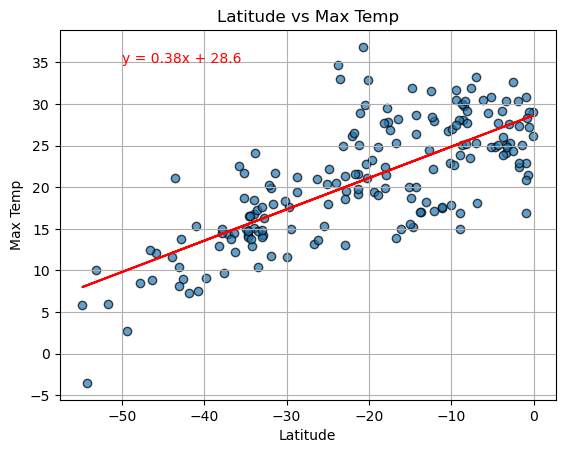

In [40]:
# Linear regression on Southern Hemisphere - Latitude vs. Max Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Create the linear regression plot for the Southern Hemisphere
plot_linear_regression(
    x_values, 
    y_values, 
    "Latitude vs Max Temp",  # Title of the plot
    "Latitude",              # X-axis label
    "Max Temp",              # Y-axis label
    (-50,35)                # Text coordinates for placing the equation
)

**Discussion about the linear relationship:** These plots shows a very stron relationship between the latitude and the maximum temperature

### Humidity vs. Latitude Linear Regression Plot

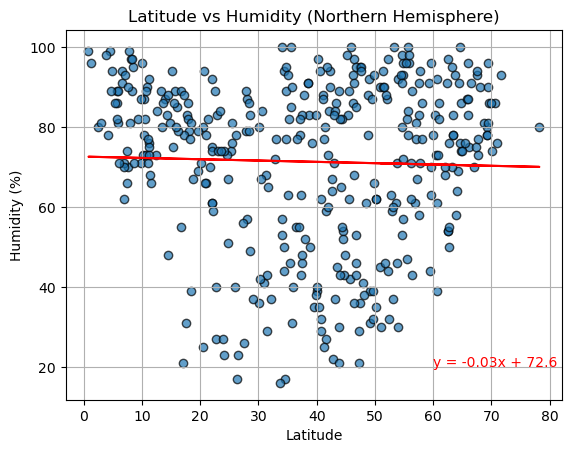

In [42]:
# Linear regression on Northern Hemisphere - Latitude vs. Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Create the linear regression plot for Latitude vs. Humidity in the Northern Hemisphere
plot_linear_regression(
    x_values, 
    y_values, 
    "Latitude vs Humidity (Northern Hemisphere)",  # Title of the plot
    "Latitude",                                    # X-axis label
    "Humidity (%)",                                 # Y-axis label
    (60, 20)                                       # Text coordinates for placing the equation
)

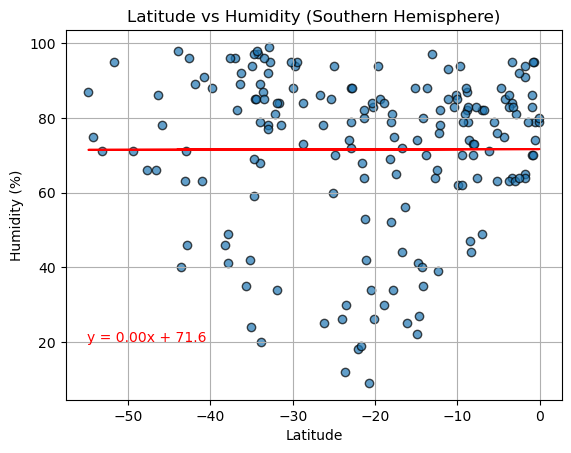

In [44]:
# Linear regression on Southern Hemisphere - Latitude vs. Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Create the linear regression plot for Latitude vs. Humidity in the Southern Hemisphere
plot_linear_regression(
    x_values, 
    y_values, 
    "Latitude vs Humidity (Southern Hemisphere)",  # Title of the plot
    "Latitude",                                    # X-axis label
    "Humidity (%)",                                 # Y-axis label
    (-55, 20)                                      # Text coordinates for placing the equation
)

**Discussion about the linear relationship:** It doesn't seem to be a strong relationship between these two values, near the latitude bounds, there is some better relationship

### Cloudiness vs. Latitude Linear Regression Plot

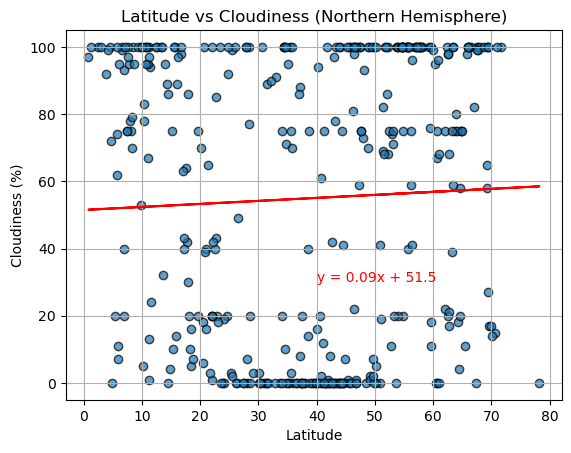

In [46]:
# Linear regression on Northern Hemisphere - Latitude vs. Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Create the linear regression plot for Latitude vs. Cloudiness in the Northern Hemisphere
plot_linear_regression(
    x_values, 
    y_values, 
    "Latitude vs Cloudiness (Northern Hemisphere)",  # Title of the plot
    "Latitude",                                      # X-axis label
    "Cloudiness (%)",                                 # Y-axis label
    (40, 30)                                         # Text coordinates for placing the equation
)

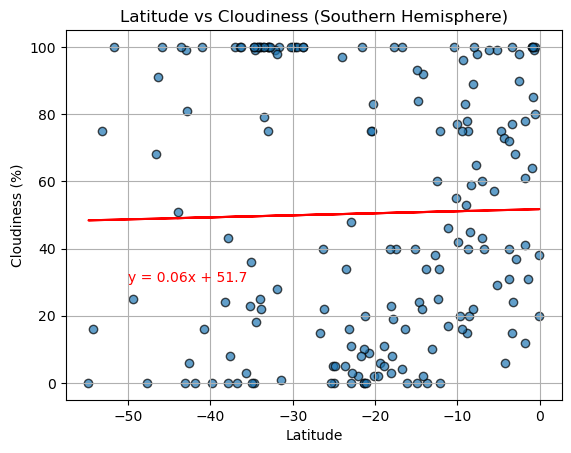

In [47]:
# Linear regression on Southern Hemisphere - Latitude vs. Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Create the linear regression plot for Latitude vs. Cloudiness in the Southern Hemisphere
plot_linear_regression(
    x_values, 
    y_values, 
    "Latitude vs Cloudiness (Southern Hemisphere)",  # Title of the plot
    "Latitude",                                      # X-axis label
    "Cloudiness (%)",                                # Y-axis label
    (-50, 30)                                        # Text coordinates for placing the equation
)

**Discussion about the linear relationship:** No relationship between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

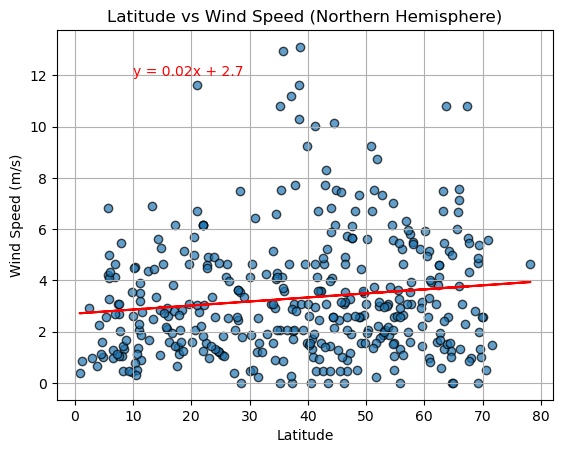

In [48]:
# Linear regression on Northern Hemisphere - Latitude vs. Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Create the linear regression plot for Latitude vs. Wind Speed in the Northern Hemisphere
plot_linear_regression(
    x_values, 
    y_values, 
    "Latitude vs Wind Speed (Northern Hemisphere)",  # Title of the plot
    "Latitude",                                      # X-axis label
    "Wind Speed (m/s)",                               # Y-axis label
    (10, 12)                                         # Text coordinates for placing the equation
)

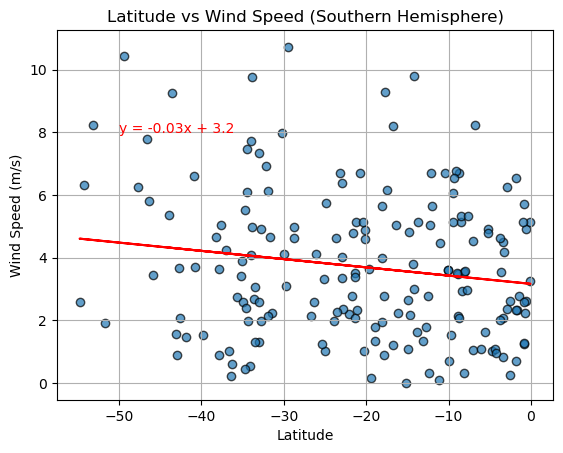

In [49]:
# Linear regression on Southern Hemisphere - Latitude vs. Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Create the linear regression plot for Latitude vs. Wind Speed in the Southern Hemisphere
plot_linear_regression(
    x_values, 
    y_values, 
    "Latitude vs Wind Speed (Southern Hemisphere)",  # Title of the plot
    "Latitude",                                      # X-axis label
    "Wind Speed (m/s)",                               # Y-axis label
    (-50, 8)                                         # Text coordinates for placing the equation
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE